## Importing Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

## Loading Data

In [89]:
data = pd.read_csv('data_for_lr.csv')

In [90]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


## Preprocessing

In [92]:
data.isnull().sum()
data = data.dropna()

## Splitting Data

In [93]:
train_input = np.array(data.x[0:500]).reshape(500,1 )
train_output = np.array(data.y[0:500]).reshape(500,1 )

test_input = np.array(data.x[500:]).reshape(199,1 )
test_output = np.array(data.y[500:]).reshape(199,1 )

## Linear Regression

In [94]:
model = LinearRegression()
model.fit(X = train_input, y = train_output)

LinearRegression()

In [95]:
model.coef_

array([[1.0009993]])

In [96]:
model.intercept_

array([-0.23603461])

## Predicting Test_input

In [97]:
predicted_value = model.predict(test_input)

In [98]:
cost = mean_squared_error(test_output, predicted_value)

In [99]:
cost

8.030031591835371

## Visualising the model performance

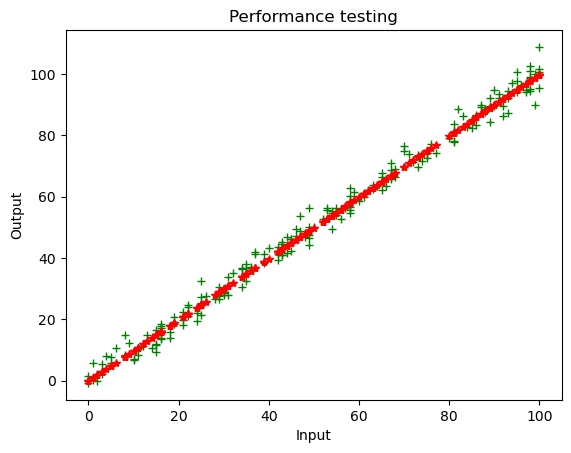

In [100]:
plt.plot(test_input, test_output, '+', color = "green")
plt.plot(test_input, predicted_value, '*', color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Saving the model

In [102]:
filename = 'finalized_model.sav'

In [103]:
pickle.dump(model, open(filename, 'wb'))

In [104]:
load_model = pickle.load(open(filename, 'rb'))